In [2]:
import time
import os
import librosa
from librosa import display
import pandas as pd
import glob 
import numpy as np
import joblib

In [29]:
path = "../Dataset/Audio_Speech_Actors_01-24"
feeling_list = []
for root,dirs,files in os.walk(path):
    if(len(files)>0):
        for file in files:
            if(int(file.split(".")[0].split("-")[2]) == 1):
                feeling_list.append('neutral')
            elif(int(file.split(".")[0].split("-")[2]) == 2):
                feeling_list.append('calm')
            elif(int(file.split(".")[0].split("-")[2]) == 3):
                feeling_list.append('happy')
            elif(int(file.split(".")[0].split("-")[2]) == 4):
                feeling_list.append('sad')
            elif(int(file.split(".")[0].split("-")[2]) == 5):
                feeling_list.append('angry')
            elif(int(file.split(".")[0].split("-")[2]) == 6):
                feeling_list.append('fearful')
            elif(int(file.split(".")[0].split("-")[2]) == 7):
                feeling_list.append('disgust')
            elif(int(file.split(".")[0].split("-")[2]) == 8):
                feeling_list.append('surprised')

In [41]:
print(len(feeling_list))
labels = pd.DataFrame(feeling_list , columns=['label'])
labels[:10]

1440


,label
0,sad
1,sad
2,happy
3,surprised
4,happy
5,calm
6,calm
7,angry
8,neutral
9,fearful


In [20]:
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for subdir,dirs,files in os.walk(path):
    for file in files:
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [28]:
df[:5]

,feature
0,"[-71.80572946267719, -71.80572946267719, -71.8..."
1,"[-57.983965439717444, -58.12975730353416, -57...."
2,"[-51.123276362992605, -51.8187817185881, -51.9..."
3,"[-59.1965370795561, -59.1965370795561, -59.196..."
4,"[-43.633354817987765, -45.07731733923093, -47...."


In [32]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [42]:
newdf = pd.concat([df3,labels], axis=1)

In [43]:
newdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-71.805729,-71.805729,-71.805729,-71.805729,-71.805729,-71.805729,-71.805729,-71.805729,-71.805729,-71.805729,...,-48.080450,-48.708313,-47.572926,-48.468573,-48.897654,-50.247077,-49.038084,-48.715561,-51.587351,sad
1,-57.983965,-58.129757,-57.216111,-57.138616,-58.032113,-57.584437,-57.990391,-57.497483,-57.414894,-58.088535,...,-39.392082,-40.890291,-42.336407,-43.509533,-42.348652,-42.181487,-45.076798,-45.154829,-39.698874,sad
2,-51.123276,-51.818782,-51.941592,-52.816664,-54.652136,-56.915060,-57.323525,-56.916718,-54.595758,-54.187025,...,-50.799301,-50.775673,-51.096929,-51.170862,-50.121700,-49.047896,-49.425883,-50.382450,-53.368919,happy
3,-59.196537,-59.196537,-59.196537,-59.196537,-59.196537,-59.196537,-59.196537,-59.196537,-59.196537,-59.196537,...,-48.255887,-48.819326,-49.072596,-49.837795,-50.631560,-49.627614,-49.795650,-49.463476,-49.567603,surprised
4,-43.633355,-45.077317,-47.110537,-47.066368,-46.836029,-46.536989,-47.593565,-47.908471,-48.006105,-47.703133,...,-17.769527,-16.043667,-14.923637,-14.839569,-15.081686,-17.688219,-18.029030,-17.959716,-18.121766,happy


In [44]:
newdf.to_csv("mfccFeatures_emotion_latest.csv")

In [45]:
from sklearn.utils import shuffle
newdf = shuffle(newdf)
newdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
652,-54.511486,-53.330406,-52.614726,-55.296237,-58.634653,-58.468420,-56.901425,-57.517333,-55.310247,-51.296041,...,-44.802806,-44.482723,-43.834654,-45.097868,-46.659864,-46.247735,-47.877711,-47.970408,-44.807865,sad
524,-56.357233,-55.912082,-53.390019,-54.204491,-51.211485,-51.550976,-50.826821,-50.699000,-51.794851,-52.526187,...,-52.346369,-52.856998,-52.708602,-52.077265,-50.171066,-49.525395,-50.240926,-52.254960,-54.420155,happy
470,-41.033862,-43.473726,-44.572001,-45.404978,-45.459836,-45.979375,-46.638765,-45.706508,-45.103673,-45.049784,...,-36.153344,-35.001036,-35.734099,-34.929305,-33.435040,-32.902015,-32.227553,-32.627929,-30.547536,fearful
11,-58.545328,-59.202478,-60.137033,-62.037020,-62.147955,-61.235847,-61.505283,-61.574950,-61.505381,-60.495135,...,-62.534837,-63.489974,-63.011312,-60.754591,-60.942248,-61.236054,-61.601959,-60.400122,-60.975515,fearful
277,-49.499418,-48.170479,-49.352273,-52.664401,-50.219882,-49.810335,-49.938510,-50.251170,-44.789156,-40.580678,...,-47.737491,-49.919034,-49.157083,-48.099718,-48.619908,-49.115151,-47.950252,-48.969603,-49.690079,surprised
621,-53.678315,-54.377914,-55.140844,-56.300240,-55.326932,-55.119810,-56.282534,-54.970338,-53.334915,-52.519249,...,-50.354847,-51.740110,-53.151655,-53.596402,-53.313462,-53.512526,-55.573837,-56.696713,-56.354921,angry
773,-64.968548,-64.968548,-64.968548,-64.968548,-64.968548,-64.968548,-64.968548,-64.968548,-64.968548,-67.252646,...,-64.678076,-64.360786,-64.642809,-62.274782,-62.417866,-63.560128,-63.105106,-63.359077,-63.284678,happy
1357,-59.376024,-59.376024,-59.376024,-59.376024,-59.376024,-59.376024,-59.376024,-59.376024,-59.376024,-59.376024,...,-46.490646,-46.694752,-48.137768,-47.240571,-47.443421,-45.964384,-47.454131,-44.490975,-44.662811,disgust
170,-70.152745,-69.913691,-67.810702,-68.664977,-71.470452,-71.470452,-71.470452,-71.470452,-71.470452,-71.470452,...,-43.779465,-43.768887,-44.085496,-43.975650,-44.347019,-44.098364,-46.298862,-47.547014,-46.484299,calm
1174,-55.243801,-56.378484,-57.449357,-57.225963,-57.018199,-55.223716,-53.239328,-52.637030,-52.636234,-53.478285,...,-35.352025,-34.598943,-34.833487,-32.159613,-30.491879,-31.179180,-29.126147,-20.525918,-15.224331,disgust


In [46]:
newdf=newdf.fillna(0)

In [47]:
#split train test

In [48]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [49]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
298,-53.756179,-49.120491,-47.523206,-49.048604,-51.008211,-51.015084,-50.169745,-50.886473,-50.275355,-51.907351,...,-47.518230,-46.052274,-45.574740,-46.517232,-48.663554,-49.160694,-51.180327,-47.262994,-45.473499,disgust
299,-48.351829,-47.869963,-46.828234,-49.911606,-50.994150,-47.716347,-47.951298,-50.378521,-49.107214,-50.084609,...,-28.069463,-27.181224,-28.187199,-28.794791,-28.706694,-30.295817,-31.448918,-29.981349,-29.475319,disgust
300,-61.363933,-60.424969,-60.542148,-63.737012,-64.673218,-61.401023,-62.801707,-64.522762,-64.676879,-63.780731,...,-58.870220,-61.683645,-59.392167,-58.266269,-60.922640,-64.676879,-64.676879,-64.676879,-64.178914,fearful
301,-62.691257,-61.921366,-58.112355,-55.378601,-56.545518,-58.246249,-58.498599,-58.577014,-59.843182,-59.149372,...,-56.717537,-58.949967,-57.629906,-59.174890,-58.905429,-57.774437,-63.483848,-65.929731,-64.601276,sad
302,-47.560947,-48.092271,-48.728114,-49.372154,-50.501240,-51.668273,-51.371920,-51.136957,-51.782069,-51.782069,...,-51.499885,-51.476879,-51.782069,-51.782069,-51.782069,-51.323238,-50.613737,-50.840188,-50.942781,fearful
303,-58.867968,-58.666244,-59.207609,-61.005363,-63.547246,-66.702907,-69.242524,-69.242524,-66.966045,-63.217095,...,-62.355711,-61.165540,-61.309433,NaN,NaN,NaN,NaN,NaN,NaN,calm
304,-63.396786,-61.330426,-59.724636,-59.734818,-59.192870,-60.495081,-63.579745,-70.879143,-70.885193,-70.885193,...,-59.904442,-65.932897,-68.419112,-66.637226,-63.676880,-59.776530,-59.531735,-65.806624,-65.705298,calm
305,-60.244715,-60.244715,-57.391485,-56.526644,-57.258402,-56.625158,-57.617670,-60.244715,-58.908708,-57.539194,...,-53.254220,-52.002472,-50.719661,-50.529916,-53.913672,-54.701472,-53.199863,-51.693457,-50.263608,happy
307,-59.529203,-58.094118,-58.708832,-60.660041,-59.539054,-58.654146,-57.798042,-56.422977,-56.930666,-59.312142,...,-57.876186,-54.990796,-55.307518,-61.926010,-56.977314,-54.574473,-53.689643,-55.768147,-58.674321,disgust
308,-57.419533,-54.810391,-53.672090,-56.541297,-54.398777,-51.947087,-54.291875,-54.611404,-55.476483,-56.366090,...,-58.682303,-60.253011,-59.709635,-58.438877,-59.303890,-63.062989,-65.427534,-65.043220,-65.979849,sad


In [50]:
train = train.fillna(0)

In [51]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
298,-53.756179,-49.120491,-47.523206,-49.048604,-51.008211,-51.015084,-50.169745,-50.886473,-50.275355,-51.907351,...,-47.518230,-46.052274,-45.574740,-46.517232,-48.663554,-49.160694,-51.180327,-47.262994,-45.473499,disgust
299,-48.351829,-47.869963,-46.828234,-49.911606,-50.994150,-47.716347,-47.951298,-50.378521,-49.107214,-50.084609,...,-28.069463,-27.181224,-28.187199,-28.794791,-28.706694,-30.295817,-31.448918,-29.981349,-29.475319,disgust
300,-61.363933,-60.424969,-60.542148,-63.737012,-64.673218,-61.401023,-62.801707,-64.522762,-64.676879,-63.780731,...,-58.870220,-61.683645,-59.392167,-58.266269,-60.922640,-64.676879,-64.676879,-64.676879,-64.178914,fearful
301,-62.691257,-61.921366,-58.112355,-55.378601,-56.545518,-58.246249,-58.498599,-58.577014,-59.843182,-59.149372,...,-56.717537,-58.949967,-57.629906,-59.174890,-58.905429,-57.774437,-63.483848,-65.929731,-64.601276,sad
302,-47.560947,-48.092271,-48.728114,-49.372154,-50.501240,-51.668273,-51.371920,-51.136957,-51.782069,-51.782069,...,-51.499885,-51.476879,-51.782069,-51.782069,-51.782069,-51.323238,-50.613737,-50.840188,-50.942781,fearful
303,-58.867968,-58.666244,-59.207609,-61.005363,-63.547246,-66.702907,-69.242524,-69.242524,-66.966045,-63.217095,...,-62.355711,-61.165540,-61.309433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,calm
304,-63.396786,-61.330426,-59.724636,-59.734818,-59.192870,-60.495081,-63.579745,-70.879143,-70.885193,-70.885193,...,-59.904442,-65.932897,-68.419112,-66.637226,-63.676880,-59.776530,-59.531735,-65.806624,-65.705298,calm
305,-60.244715,-60.244715,-57.391485,-56.526644,-57.258402,-56.625158,-57.617670,-60.244715,-58.908708,-57.539194,...,-53.254220,-52.002472,-50.719661,-50.529916,-53.913672,-54.701472,-53.199863,-51.693457,-50.263608,happy
307,-59.529203,-58.094118,-58.708832,-60.660041,-59.539054,-58.654146,-57.798042,-56.422977,-56.930666,-59.312142,...,-57.876186,-54.990796,-55.307518,-61.926010,-56.977314,-54.574473,-53.689643,-55.768147,-58.674321,disgust
308,-57.419533,-54.810391,-53.672090,-56.541297,-54.398777,-51.947087,-54.291875,-54.611404,-55.476483,-56.366090,...,-58.682303,-60.253011,-59.709635,-58.438877,-59.303890,-63.062989,-65.427534,-65.043220,-65.979849,sad


In [52]:
test = test.fillna(0)

In [53]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [54]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [56]:
X_train.shape

(1171, 216)

In [57]:
#CNN

In [58]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [82]:
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [83]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                 input_shape=(256,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_13 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_14 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 27, 128)           82048     
__________

In [84]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [85]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

ValueError: Error when checking input: expected conv1d_18_input to have shape (None, 256, 1) but got array with shape (1171, 216, 1)

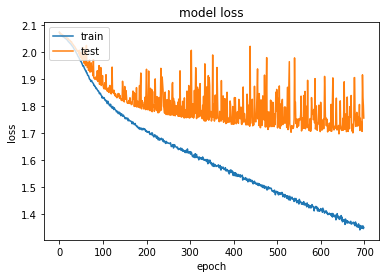

In [80]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#RNN

In [91]:
epochs = 8
n_classes = 1
n_units = 200
n_features = 216
batch_size = 35

In [92]:
xplaceholder= tf.placeholder('float',[None,n_features])
yplaceholder = tf.placeholder('float')

In [94]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.contrib import rnn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

def recurrent_neural_network_model():
    layer ={ 'weights': tf.Variable(tf.random_normal([n_units, n_classes])),'bias': tf.Variable(tf.random_normal([n_classes]))}

    x = tf.split(xplaceholder, n_features, 1)
    print(x)

    lstm_cell = rnn.BasicLSTMCell(n_units)
    
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
   
    output = tf.matmul(outputs[-1], layer['weights']) + layer['bias']

    return output

def train_neural_network():
    logit = recurrent_neural_network_model()
    logit = tf.reshape(logit, [-1])

    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=yplaceholder))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    with tf.Session() as sess:

        tf.global_variables_initializer().run()
        tf.local_variables_initializer().run()

        for epoch in range(epochs):
            epoch_loss = 0

            i = 0
            for i in range(int(len(X_train) / batch_size)):

                start = i
                end = i + batch_size

                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_train[start:end])
                
                _, c = sess.run([optimizer, cost], feed_dict={xplaceholder: batch_x, yplaceholder: batch_y})
                epoch_loss += c
                i += batch_size

            print('Epoch', epoch, 'completed out of', epochs, 'loss:', epoch_loss)

        pred = tf.round(tf.nn.sigmoid(logit)).eval({xplaceholder: np.array(X_test), yplaceholder: np.array(y_test)})
        f1 = f1_score(np.array(y_test), pred, average='macro')
        accuracy=accuracy_score(np.array(y_test), pred)
        recall = recall_score(y_true=np.array(y_test), y_pred= pred)
        precision = precision_score(y_true=np.array(y_test), y_pred=pred)
        print("F1 Score:", f1)
        print("Accuracy Score:",accuracy)
        print("Recall:", recall)
        print("Precision:", precision)


train_neural_network()

[<tf.Tensor 'split_3:0' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:1' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:2' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:3' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:4' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:5' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:6' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:7' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:8' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:9' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:10' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:11' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:12' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:13' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:14' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:15' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:16' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:17' shape=(?, 1) dtype=float32>, <tf.Tensor 'split_3:18' shape=(?, 1) dtype=float32>, <t

ValueError: Variable rnn/basic_lstm_cell/kernel already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-90-2c0eb9a60215>", line 16, in recurrent_neural_network_model
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
  File "<ipython-input-90-2c0eb9a60215>", line 23, in train_neural_network
    logit = recurrent_neural_network_model()
  File "<ipython-input-90-2c0eb9a60215>", line 63, in <module>
    train_neural_network()
